In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

# TASK - 1

In [2]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
data = pd.read_csv(r"/content/gdrive/MyDrive/Colab Notebooks/smartBridge/archive/drug200.csv")

In [4]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [5]:
data.describe(include='all')

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
count,200.000000,200,200,200,200.000000,200
unique,NaN,2,3,2,NaN,5
top,NaN,M,HIGH,HIGH,NaN,DrugY
freq,NaN,104,77,103,NaN,91
mean,44.315000,NaN,NaN,NaN,16.084485,NaN
std,16.544315,NaN,NaN,NaN,7.223956,NaN
min,15.000000,NaN,NaN,NaN,6.269000,NaN
25%,31.000000,NaN,NaN,NaN,10.445500,NaN
50%,45.000000,NaN,NaN,NaN,13.936500,NaN
75%,58.000000,NaN,NaN,NaN,19.380000,NaN


In [6]:
data.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [8]:
data.Sex.unique()

array(['F', 'M'], dtype=object)

In [9]:
data.Drug.unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [10]:
data.Drug.value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [11]:
data.corr()

<ipython-input-11-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Age,Na_to_K
Age,1.000000,-0.063119
Na_to_K,-0.063119,1.000000


**Outlier Removal**

<Axes: >

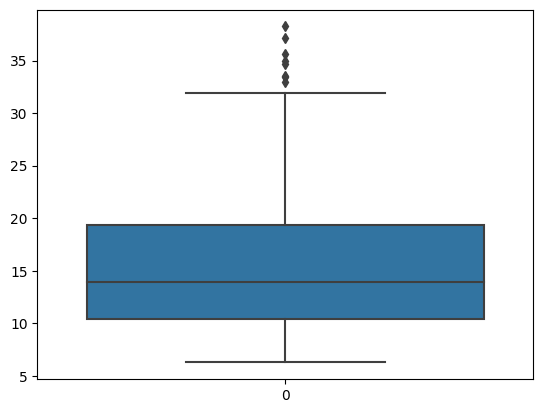

In [12]:
sns.boxplot(data.Na_to_K)

In [13]:
q1 = data.Na_to_K.quantile(.25)
q3 = data.Na_to_K.quantile(.75)

In [14]:
q1 = data.Na_to_K.quantile(.25)
q1

10.4455

In [15]:
q3 = data.Na_to_K.quantile(.75)
q3

19.38

In [16]:
IQR = q3 - q1
IQR

8.9345

In [17]:
upper_limit = q3+1.5*IQR
lower_limit = q1-1.5*IQR
upper_limit

32.78175

In [18]:
data = data[data.Na_to_K<upper_limit]


<Axes: >

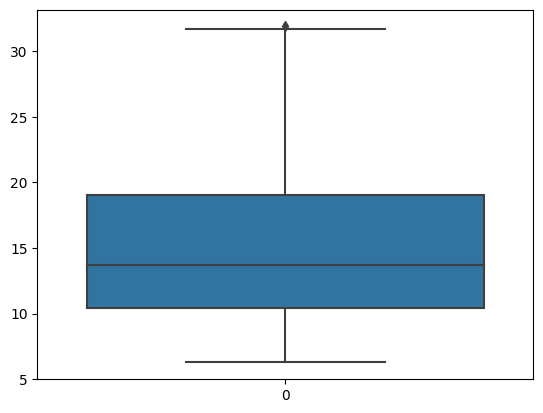

In [19]:
sns.boxplot(data.Na_to_K)

In [20]:
data.shape

(192, 6)

In [21]:
p99 = data.Na_to_K.quantile(0.99)
p99

30.668620000000004

In [22]:
data_p = data[data.Na_to_K<=p99]

<Axes: >

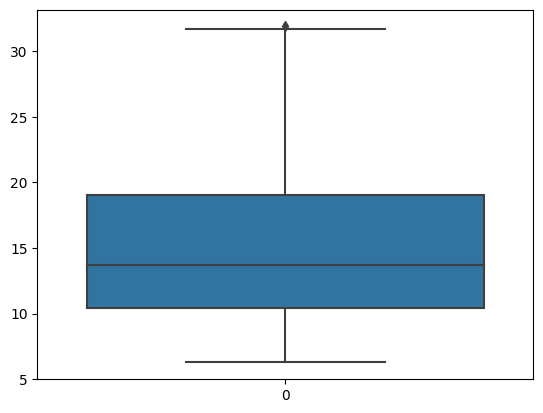

In [23]:
sns.boxplot(data.Na_to_K)

In [24]:
data_p.shape

(190, 6)

In [25]:
from scipy import stats

In [26]:
Nzscore = stats.zscore(data.Na_to_K)
Nzscore

0      1.626227
1     -0.355498
2     -0.836949
3     -1.211250
4      0.444497
         ...   
195   -0.602122
196   -0.531173
197   -0.872504
198   -0.205680
199   -0.637354
Name: Na_to_K, Length: 192, dtype: float64

In [27]:
data_z = data[np.abs(Nzscore)<=3]

<Axes: >

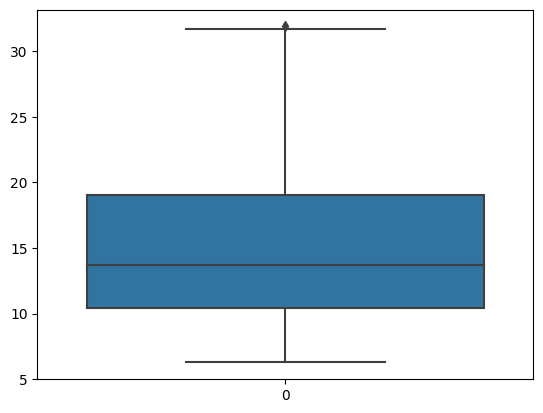

In [28]:
sns.boxplot(data_z.Na_to_K)

In [29]:
data_z.shape

(192, 6)

In [30]:
x = data.iloc[0:,0:5]
x.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,F,HIGH,HIGH,25.355
1,47,M,LOW,HIGH,13.093
2,47,M,LOW,HIGH,10.114
3,28,F,NORMAL,HIGH,7.798
4,61,F,LOW,HIGH,18.043


In [31]:
y = data.iloc[0:,5]
y.head(5)

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [32]:
from sklearn.model_selection import train_test_split

In [33]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=20)

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()

In [36]:
data.head(2)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC


In [37]:
xtrain['Sex']=le.fit_transform(xtrain['Sex'])
xtrain['Sex']

171    1
137    0
47     1
45     0
12     1
      ..
153    0
142    1
161    0
15     0
102    0
Name: Sex, Length: 153, dtype: int64

In [38]:
xtest['Sex']=le.transform(xtest['Sex'])
xtest['Sex']

29     1
141    0
185    0
81     1
78     0
173    0
172    0
68     1
125    0
65     0
13     0
175    0
144    1
60     0
182    0
52     1
73     0
111    0
177    1
35     1
196    1
48     1
5      0
174    1
91     1
163    0
133    1
180    0
90     1
92     0
154    1
120    1
199    0
191    1
164    1
165    1
116    1
106    1
107    1
Name: Sex, dtype: int64

In [39]:
xtrain['BP']=le.fit_transform(xtrain['BP'])
xtrain['BP']

171    1
137    0
47     1
45     2
12     1
      ..
153    1
142    0
161    0
15     0
102    1
Name: BP, Length: 153, dtype: int64

In [40]:
xtest['BP']=le.transform(xtest['BP'])
xtest['BP']

29     1
141    1
185    2
81     2
78     0
173    1
172    2
68     2
125    0
65     2
13     1
175    0
144    0
60     1
182    1
52     1
73     2
111    2
177    2
35     2
196    1
48     2
5      2
174    0
91     0
163    0
133    2
180    0
90     2
92     0
154    1
120    2
199    1
191    0
164    0
165    1
116    2
106    2
107    1
Name: BP, dtype: int64

In [41]:
xtrain['Cholesterol']=le.fit_transform(xtrain['Cholesterol'])
xtrain['Cholesterol']

171    1
137    0
47     0
45     1
12     0
      ..
153    1
142    1
161    1
15     1
102    0
Name: Cholesterol, Length: 153, dtype: int64

In [42]:
xtest['Cholesterol'] = le.transform(xtest['Cholesterol'])
xtest['Cholesterol']

29     0
141    1
185    1
81     0
78     0
173    1
172    1
68     0
125    1
65     1
13     0
175    0
144    0
60     1
182    1
52     1
73     1
111    1
177    0
35     1
196    0
48     0
5      0
174    1
91     1
163    1
133    0
180    1
90     0
92     0
154    1
120    0
199    1
191    0
164    1
165    0
116    1
106    0
107    0
Name: Cholesterol, dtype: int64

In [45]:
xtrain['Na_to_K']=le.fit_transform(xtrain['Na_to_K'])
xtrain['Na_to_K']

171     31
137     75
47      38
45       9
12      99
      ... 
153     95
142     12
161     30
15     103
102     79
Name: Na_to_K, Length: 153, dtype: int64

In [46]:
xtest['Na_to_K'] = le.transform(xtest['Na_to_K'])
xtest['Na_to_K']

29     17
141    25
185    25
81      7
78     13
173    18
172    17
68     24
125    25
65     27
13     20
175    18
144     9
60     29
182    11
52     27
73     22
111     6
177    19
35      7
196    12
48     31
5       8
174    12
91     15
163    28
133    25
180    22
90     16
92     29
154    16
120    27
199    11
191     8
164    19
165    18
116     9
106    11
107    20
Name: Na_to_K, dtype: int64

In [47]:
ytrain=le.fit_transform(ytrain)

In [48]:
ytest=le.fit_transform(ytest)

In [49]:
xtrain.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
171,45,1,1,1,31
137,35,0,0,0,75
47,68,1,1,0,38
45,66,0,2,1,9
12,43,1,1,0,99


In [50]:
ytrain

array([4, 1, 3, 4, 0, 4, 4, 4, 3, 2, 1, 2, 0, 2, 0, 0, 1, 4, 0, 0, 3, 4,
       0, 0, 0, 1, 1, 4, 4, 4, 0, 4, 0, 0, 1, 0, 4, 0, 4, 1, 4, 4, 1, 0,
       1, 4, 4, 3, 2, 0, 4, 4, 4, 0, 3, 0, 4, 4, 0, 0, 0, 4, 0, 3, 3, 2,
       4, 0, 0, 0, 0, 4, 4, 0, 4, 4, 2, 0, 0, 0, 0, 0, 4, 0, 4, 2, 0, 2,
       1, 4, 1, 1, 1, 4, 1, 0, 1, 0, 3, 0, 4, 0, 0, 1, 0, 0, 0, 4, 4, 4,
       0, 2, 0, 4, 1, 0, 0, 2, 0, 0, 4, 1, 4, 3, 3, 0, 3, 0, 4, 3, 0, 2,
       0, 4, 2, 0, 3, 0, 2, 3, 4, 4, 2, 0, 4, 4, 0, 1, 4, 2, 2, 0, 3])

In [51]:
xtest.head(5)

,Age,Sex,BP,Cholesterol,Na_to_K
29,45,1,1,0,17
141,64,0,1,1,25
185,57,0,2,1,25
81,64,1,2,0,7
78,19,0,0,0,13


In [52]:
ytest

array([0, 0, 0, 3, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 3, 0, 0, 3, 0, 3, 2, 0,
       3, 1, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 0, 0, 3, 3, 0])

# TASK - 2
Task 2: Build the ANN model with (input layer, min 3 hidden layers & output layer)


In [53]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [54]:
model = Sequential()
# Input layer
model.add(Dense(4,activation='relu'))
# 1st hidden layer
model.add(Dense(64,activation='relu'))
# 2nd hidden layer
model.add(Dense(32,activation='relu'))
# 3nd hidden layer
model.add(Dense(32,activation='relu'))
# Output layer
model.add(Dense(1,activation='linear'))

In [55]:
model.compile(optimizer='adam',loss='mse',metrics=['accuracy'])

In [56]:
model.fit(xtrain,ytrain,batch_size=5,epochs=10,validation_data=(xtest,ytest))

Epoch 1/10
31/31 [==============================] - 2s 11ms/step - loss: 4.6148 - accuracy: 0.2157 - val_loss: 3.4277 - val_accuracy: 0.1026
Epoch 2/10
31/31 [==============================] - 0s 4ms/step - loss: 2.6138 - accuracy: 0.2353 - val_loss: 2.7538 - val_accuracy: 0.1538
Epoch 3/10
31/31 [==============================] - 0s 4ms/step - loss: 2.5777 - accuracy: 0.2614 - val_loss: 2.8431 - val_accuracy: 0.1026
Epoch 4/10
31/31 [==============================] - 0s 4ms/step - loss: 2.7209 - accuracy: 0.2614 - val_loss: 2.6916 - val_accuracy: 0.1026
Epoch 5/10
31/31 [==============================] - 0s 4ms/step - loss: 2.5656 - accuracy: 0.2941 - val_loss: 6.3228 - val_accuracy: 0.1026
Epoch 6/10
31/31 [==============================] - 0s 3ms/step - loss: 2.4293 - accuracy: 0.2614 - val_loss: 4.7924 - val_accuracy: 0.1026
Epoch 7/10
31/31 [==============================] - 0s 3ms/step - loss: 2.4173 - accuracy: 0.2941 - val_loss: 4.1999 - val_accuracy: 0.1026
Epoch 8/10
31/31 [=

In [57]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 24        
                                                                 
 dense_1 (Dense)             (None, 64)                320       
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 32)                1056      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 3,513
Trainable params: 3,513
Non-trainable params: 0
_________________________________________________________________


# TASK - 3
Test the model with random data

In [58]:
model.predict([[53,1,11,0,20]])

1/1 [==============================] - 0s 124ms/step


array([[2.3758566]], dtype=float32)

In [59]:
ypred = model.predict(xtest)

2/2 [==============================] - 0s 4ms/step


In [60]:
comp = pd.DataFrame(ytest)

In [61]:
comp.columns=['Actual_values']
comp['Predicted_values'] = ypred

In [62]:
comp

,Actual_values,Predicted_values
0,0,2.477618
1,0,3.278986
2,0,2.942045
3,3,3.274327
4,1,1.402685
5,0,2.330554
6,0,2.184690
7,0,2.813216
8,0,1.024236
9,0,3.387571
